# Output Binary Black Hole Properties

In paper Zhu et al. 2025, we investigate how the binary companion influences the superradiance gravitational atom (GA) in reality. By obtaining the SEVN output for the Binary Black Hole (BBH) remnant properties, we are able to calculate both the superradiance rate and the corrections to the superradiance rate. Details of SEVN simulation package can be found in 

Zhu et al. 2025: https://doi.org/10.48550/arXiv.2409.14159 \
Spera et al. 2018: https://doi.org/10.1093/mnras/stz359

Begin by reviewing the output data. We have evolved a total of around 3.0*10^7 stellar binaries and selected all the remnants where both remnants are black holes.  The simulation output includes the mass of the primary (Mass_0, in solar mass) and secondary BHs (Mass_1, in solar masses), the semimajor axis (Semimajor) for the orbit, and the eccentricity (Eccentricity) of the orbit. The remnant type equals to 6 indicates that the remnant is a BH.

In [1]:
# Constants for unit transformation 

Msun=1.9884099* 10**30        # to kg 
eVtokg=1.7826619216278975e-36 # to kg
Rsun=6.957*10**8              # to meter
Myr=3.1536e13                 # to second

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

# Read the data and save it in ddf 
ddf=pd.read_csv('/home/hzhuav/SEVN_Result/Output1.dat',delimiter=' ',header=0)
ddf

,ID,name,Mass_0,RemnantType_0,Mass_1,RemnantType_1,Semimajor,Eccentricity
0,6,402748869422646,13.704040,6,16.971260,6,87494.2300,0.023631
1,12,843618165177474,18.667630,6,19.054640,6,25329.4300,0.235629
2,15,999940604697875,45.106340,6,13.726090,6,761.9675,0.008499
3,1004,844142907982993,7.081709,6,5.750017,6,152.7133,0.353820
4,3005,402270096778797,28.347130,6,6.560349,6,2531.5220,0.206282
...,...,...,...,...,...,...,...,...
8602942,28983152,997087945223631,27.932890,6,5.810605,6,2024.3770,0.651537
8602943,28983162,190633857428840,7.485959,6,9.539038,6,225.9608,0.129645
8602944,28984146,407767383028673,33.464130,6,26.930120,6,15676.7800,0.415756
8602945,28984161,982373687732211,6.162466,6,7.684832,6,21.9911,0.036108


The distribution plot for semimajor axis, BH mass and eccentricity for BBHs obtained from SEVN simulation are as follows: 

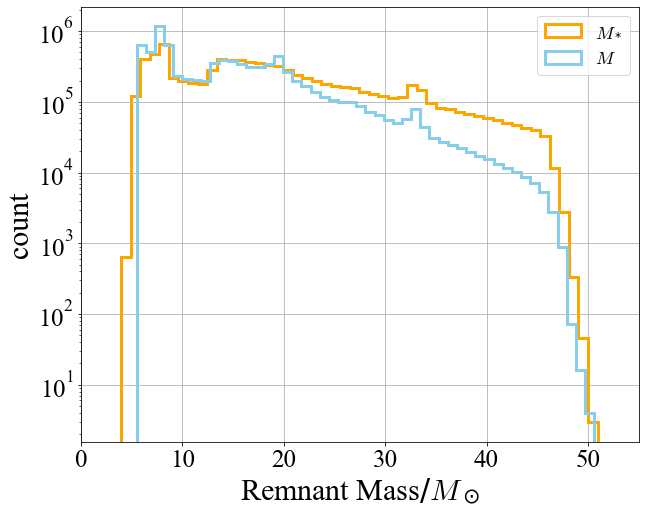

In [5]:
# Plot of mass distribution of primary and secondary remnant 
import numpy as np
import matplotlib 
import  matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 

# Font setting part, you can delete it.
font1=FontProperties(fname=r'/usr/share/fonts/truetype/Times/times.ttf',size=30)
font2=FontProperties(fname=r'/usr/share/fonts/truetype/Times/times.ttf',size=25)
plt.rcParams["font.family"] = 'DejaVu Sans'
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'STIXSizeFourSym '
matplotlib.rcParams['mathtext.it'] ='STIXSizeFourSym'  

#Primary and seconday BH mass in solar mass
M1=ddf.Mass_0.to_numpy()
M2=ddf.Mass_1.to_numpy()
plt.figure(figsize=(10,8))
plt.hist(M1,label='M1',lw=3,bins=50,color='orange',edgecolor='orange',histtype='step')
plt.hist(M2,label='M2',lw=3,bins=50,color='skyblue',edgecolor='skyblue',histtype='step')
plt.legend(['$M_*$','$M$'],fontsize=18)
plt.grid(True)
plt.xlabel(r'Remnant Mass$/M_\odot$',fontproperties=font1)
plt.ylabel('count',fontproperties=font1)
plt.yscale("log")
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.xlim((0,55))
plt.show()

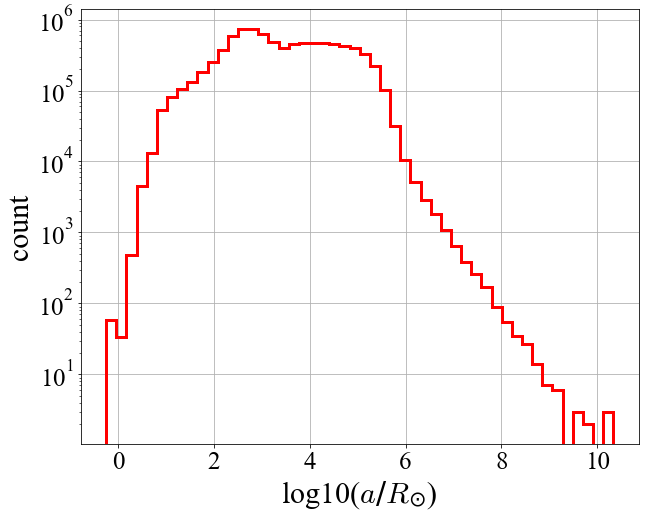

In [6]:
# Semi major axis for BBH 

a = ddf.Semimajor * 696340*10**3 # in meters
a_solar =ddf.Semimajor # in solar radius
plt.figure(figsize=(10,8))
plt.hist(np.log10(a_solar),lw=3,bins=50,edgecolor='red',histtype='step')
plt.yscale('log')
plt.grid(True)
plt.xlabel(r'log10'+'('+'$a/R_{\odot}$'+')',fontproperties=font1)
plt.ylabel('count',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

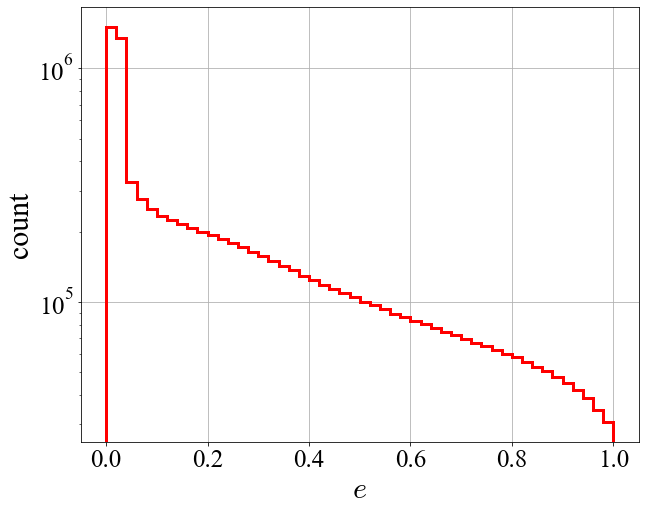

In [7]:
# Eccentricity distribution 
e =ddf.Eccentricity 
plt.figure(figsize=(10,8))
plt.hist(e,lw=3,bins=50,edgecolor='red',histtype='step')
plt.yscale('log')
plt.grid(True)
plt.xlabel(r'$e$',fontproperties=font1)
plt.ylabel('count',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

# Spin Model 

To compute the effective superradiance rate as introduced in our paper, we still require the BH spin. While SEVN includes several spin models, the actual BH spin model remains highly uncertain. Generally, BBHs with small separations tend to possess significant spin due to efficient accretion. However, superradiance termination effect greatly depends on both spin and the binary separation. Consequently, we initially explore a pre-existing Wolf-Rayet model and then investigate our Plateau (PT) model, inspired by the WR model but designed with adjustable parameters to encompass the uncertainties in spin models.

Details of WR spin model can be found in 

Bavera et al. 2021: https://iopscience.iop.org/article/10.3847/2515-5172/ac053c

From the paper, we found that the spin of the secondary BH $\tilde{a}$ is well approximated by 


$$    \hspace{-2mm}\tilde{a} = \left\{
    \begin{array}{ll}
    f^\alpha \log_{10}^2 \left(\frac{P}{\text{day}}\right) + f^\beta \log_{10} \left(\frac{P}{\text{day}}\right) &~,~  0.1 \leq \frac{P}{\text{day}} \leq 1 \\&\\
    0 &~,~  \frac{P}{\text{day}} > 1 \\&\\
    \tilde{a}|_{P=0.1\,{\rm day}} &~,~  \frac{P}{\text{day}} <0.1
    \end{array}
    \right.$$
where $f^{(\alpha, \beta)} = -c_1^{(\alpha, \beta)} \left[c_2^{(\alpha, \beta)} + \exp\left(-c_3^{(\alpha, \beta)} M/{M_\odot}\right)\right]$, with coefficients $c_1^{(\alpha, \beta)}$, $c_2^{(\alpha, \beta)}$, and $c_3^{(\alpha, \beta)}$ determined from least-square regression (see Bavera et al.2021 for more details). 

In [8]:
# WR Spin Model 

#########################
# MODELLING THE BH SPIN #
#########################

# The WR spin model code we generally use based on the equation above 
def model(m_WR,T,state='c_depletion'): 
    '''modelling the spin of the black hole assuming that it is forming from a WR star (Equation 5)
    INPUT:
        m_WR = mass of the Wolf Rayet star (can be approximanted with the BH)
        T = period in days
        state = c_deplation/He_deplation change slightly the parameters
    OUTPUT:
        spin of the black hole'''
    if state == 'c_depletion':
        c1a = 0.051237
        c2a = 0.029928
        c3a = 0.282998
        c1b = 0.027090
        c2b = 0.010905
        c3b = 0.422213
    elif state == 'he_depletion':
        c1a = 0.059305
        c2a = 0.035552
        c3a = 0.270245
        c1b = 0.026960
        c2b = 0.011001
        c3b = 0.420739
    else:
        raise ValueError('state not supported!')
    
    #a_BH2(T >= 1.) = 0 
    a_BH2 = np.zeros(len(T))
    
    def constant(m_WR, c1, c2, c3):
        return -c1/(c2+np.exp(-c3*m_WR))
    
    alpha = constant(m_WR[(0.1<=T)&(T<1.)] , c1a, c2a, c3a)
    beta = constant(m_WR[(0.1<=T)&(T<1.)] , c1b, c2b, c3b)
    a_BH2[(0.1<=T)&(T<1.)] = alpha*np.log10(T[(0.1<=T)&(T<1.)])**2+beta*np.log10(T[(0.1<=T)&(T<1.)])
    a_BH2[T<0.1] = constant(m_WR[T<0.1] , c1a, c2a, c3a)-constant(m_WR[T<0.1] , c1b, c2b, c3b)
    
    return a_BH2


# This code is defined only for specific plot 
def modelnew(m_WR,T): 
    c1a = 0.059305
    c2a = 0.035552
    c3a = 0.270245
    c1b = 0.026960
    c2b = 0.011001
    c3b = 0.420739
    
    def constant(m_WR, c1, c2, c3):
        return -c1/(c2+np.exp(-c3*m_WR))
    
    alpha = constant(m_WR, c1a, c2a, c3a)
    beta = constant(m_WR, c1b, c2b, c3b)
    a_BH2= alpha*T**2+beta*T
    
    return a_BH2

The relation between the mass, spin of the secondary BH, and the binary period is 

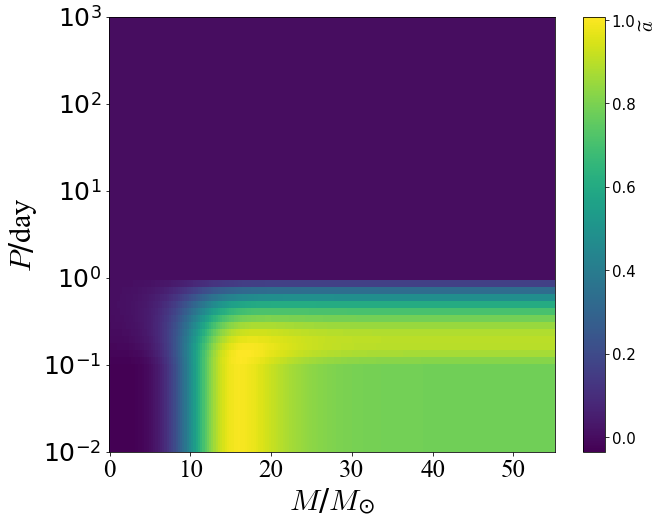

In [9]:
# Plot of the relation between secondary spin, BH mass and binary period based on WR spin model 

import matplotlib.cm as cm
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['text.usetex'] = False

x = np.linspace(0,55,200)
y = np.linspace(-2, 14,200)
X,Y=np.meshgrid(x,y)
Z=modelnew(X,Y)*(Y<0)*(Y>-1)+modelnew(X,-1)*(Y<=-1)

plt.figure(figsize=(10,8))
plt.xlabel('$\mathit{M/M_{\odot}}$',size=30)
plt.ylabel('$P/$'+'day',size=30,fontproperties=font2)
plt.pcolormesh(X, Y, Z,cmap='viridis')
cb1=plt.colorbar(ticks=np.linspace(0, 1,6))
cb1.set_label('$\widetilde{a}$',loc='top',fontsize=20)
cb1.ax.tick_params(labelsize=15)
plt.ylim((-2,3))
plt.xticks(fontproperties=font2)
plt.yticks([-2,-1,0,1,2,3],['$10^{-2}$','$10^{-1}$','$10^{0}$','$10^{1}$','$10^{2}$','$10^{3}$'],fontproperties=font2)
matplotlib.pyplot.grid(False)
plt.show()

Inspired by the WR model, we choose to design our own spin model with different parameters, which are to be varied in the later analysis of superradiance termination. Consider 

$$    \tilde{a}=\frac{1}{4}\text{erfc}\left(\frac{\ln P/P_C}{\sqrt{2}w_P}\right)\text{erfc}\left(\frac{M_C-M}{\sqrt{2}w_M}\right) ~,$$

where $\text{erfc}(x)$ is the complementary error function. This PT model is an emulation of the WR model with its essential features preserved. The PT model is characterized by a plateau region with two cutoffs ($P_C$ and $M_C$), along with two width parameters ($w_P$ and $w_M$) to adjust the sharpness of the cutoffs. 

In [10]:
# PT spin model code based on the formula we gave above 

#########################
# MODELLING THE BH SPIN #
#########################
def ourspin(period,BHmass,p0,M0,wp,wm):
    '''Cook up our own spin model
    INPUT:
        period = period in days
        BHmass = mass of the superradiant BH in solar mass
        p0 = period cutoff
        M0 = BH mass cutoff
        wp,wm = two parameters that we can adjust
    OUTPUT:
        spin of the black hole'''
    atilde = (1/4)* special.erfc(np.log(period/p0)/(np.sqrt(2)*wp)) * special.erfc((M0-BHmass)/(np.sqrt(2)*wm))
    
    return atilde

An example illustrating the relationship between the mass, spin of the secondary black hole, and the binary period using the PT model with $P_C=0.8$, $w_P=0.5$, $M_C=10$, and $w_M=2$ is as follows

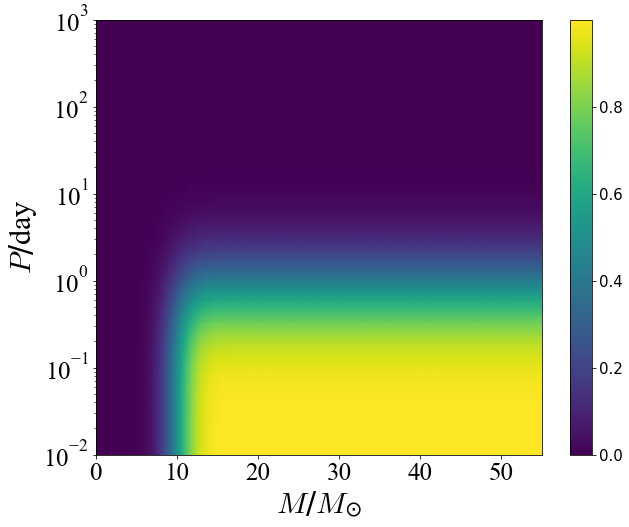

In [11]:
# Plot of the relation between secondary spin, BH mass and binary period based on PT spin model with P_C=0.8, w_P=0.5, M_C=10, w_M=2 

from scipy import special

# If you want to modify the PT model parameter to get other plot, directly modify in the line below 
Z1=(1/4)* special.erfc(np.log10(10**Y/0.8)/(np.sqrt(2)*0.5)) * special.erfc((10-X)/(np.sqrt(2)*2))

plt.figure(figsize=(10,8))
plt.xlabel('$M/M_{\odot}$',size=30)
plt.ylabel('$P/$'+'day',size=30,fontproperties=font2)
ax=plt.pcolormesh(X, 10**Y, Z1,cmap='viridis',shading='gouraud')
plt.yscale('log')
plt.ylim((0,1000))
cb1=plt.colorbar(ticks=np.linspace(0, 1,6))
cb1.ax.tick_params(labelsize=15)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
matplotlib.pyplot.grid(False)
plt.show()

Therefore, we can plot the distribution of spin using our SEVN simulation output and observe how it behaves with different spin models (such as the WR spin model and the PT spin model with varying parameter choices).

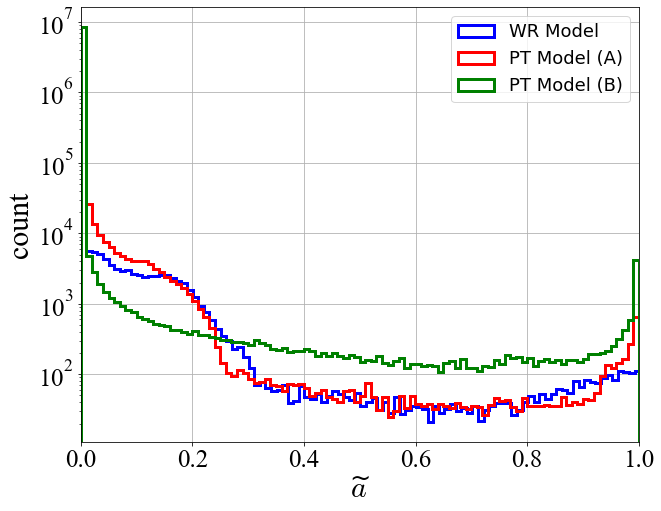

In [12]:
#To calculate the spin, the period of the orbital motion and the superradiant BH mass Mb are needed

from scipy.constants import *
DAY=3600 * 24

# Mass ratio: primary BH mass over secondary BH mass
q = M1/M2

#Superradiant BH mass
Mb = M2
Mb_kg = M2*Msun

# Semi latus rectum 
p = a * (1 - e**2)

# Period T = 2*np.pi*np.sqrt(p**3/(G * Mb*(1+q)*(1-e**2)**3))
T = 2*np.pi*np.sqrt(p**3/(G * Mb_kg*(1+q)*(1-e**2)**3)) # in seconds
T = T / DAY                                             # in days
T = np.array(T)

#plt.title('BH Spin for PT Model')
at=model(Mb,T)                   # Spin distribution with WR spin model 
atPT=ourspin(T,Mb,0.8,10,0.5,2)     # Spin distribution with PT spin model with P_C=0.8, w_P=0.5, M_C=10, w_M=2 
atPT1=ourspin(T,Mb,0.4,5,0.25,1)    # Spin distribution with PT spin model with P_C=0.4, w_P=0.25, M_C=5, w_M=1 

plt.figure(figsize=(10,8))
plt.xlim((0,1))
plt.yscale('log')
plt.hist(at,lw=3,bins=100,edgecolor='blue',histtype='step',label='WR Model')
plt.hist(atPT,lw=3,bins=100,edgecolor='red',histtype='step',label='PT Model (A)')
plt.hist(atPT1,lw=3,bins=100,edgecolor='green',histtype='step',label='PT Model (B)')
plt.grid(True)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.xlabel('$\widetilde{a}$',fontproperties=font1)
plt.ylabel('count',fontproperties=font1)
plt.legend(fontsize=18)
plt.show()

# Effective Superradiant Rate 

Considering ultralight bosonic cloud around the BH, the cloud will grow or decay exponentially with time by extracting BH spin. The rate of growth/decay can be calculated as 

$$\begin{aligned}
 \Gamma_{n00}&=-\frac{4}{n^3}\left(1+\sqrt{1-\tilde{a}^2}\right)\mu\alpha^5 ~ ,\label{00ModeAbsorptionRate} \\\hspace{-2mm} \Gamma_{nlm}&=2\tilde{r}_+\, C_{nl}g_{lm}(\tilde{a},\alpha,\omega_{nlm})(m\Omega_H-\omega_{nlm})\alpha^{4l+5} ~ .
 \end{aligned}$$

Detail form of superradiance rate can be found in

Detweiler 1980: https://doi.org/10.1103/PhysRevD.22.2323


We consider the most dominant mode $\psi_{211}$ and $\psi_{322}$. Those superradiance rate can be calculated with the following codes according to the formula we mentioned above 

In [13]:
import scipy.constants as s

################################
# SUPERRADIANCE RATE 211 STATE #
################################

def GAMMA_211(at,Mb,mu = 1.34e-12,verbose=False):
    '''
    INPUT:
        at = spin of the black hole
        Mb = mass of the black hole in solar masses
        mu = mass of the boson in electron volts
    OUTPUT:
        GAMMA = superradiance rate for 211 state
    ''' 

    
    mu = mu * eVtokg # conversion to from eV to kg
    Mb = Mb * Msun   # conversion from solar masses to kg
    alpha = (G * Mb * mu ) / (s.c * s.hbar)
    
    gamma211 = c**3 * (alpha**9 * (np.sqrt(1 - at**2) + 1) * ((at - 2 * alpha * (np.sqrt(1 - at**2) + 1))**2 - at**2 + 1) * ((17 * alpha**5) / 64 + alpha**3 / 4 - 2 * alpha + at * (1 / (np.sqrt(1 - at**2) + 1) - (5000000000 * alpha**6) / 30000000003))) / (48 * s.G * Mb)

    if verbose:
        print('Boson mass:\t\t %.3e kg (%.3e eV)'%(mu,mu/1.78e-36))
        print('Black Hole mass:\t %.3e kg (%.0f Msun)'%(Mb, Mb/2e30))
        print('Alpha:\t\t\t %.3e '%alpha ) 
        print("Gamma:\t\t\t %.3e"%gamma211)
        
    return gamma211

################################
# SUPERRADIANCE RATE 322 STATE #
################################
def GAMMA_322(at,Mb,mu = 1.34e-12,verbose=False):    
    '''
    INPUT:
        at = spin of the black hole
        Mb = mass of the black hole in solar masses
        mu = mass of the boson in electron volts
    OUTPUT:
        GAMMA = superradiance rate'''
    

    
    mu = mu * eVtokg # conversion to from eV to kg
    Mb = Mb * Msun   # conversion from solar masses to kg
    alpha = (G * Mb * mu ) / (c * hbar)
    
    gamma = c**3 * (8 * alpha**13 * (1 + np.sqrt(1 - at**2)) * (-alpha + alpha**3 / 18. + (23 * alpha**5)/1080. - (1.6e10 * alpha**6 * at) / 1.620000000081e12 + at / (1 + np.sqrt(1 - at**2))) * (4 - 4 * at**2 + (2 * at - 2 * alpha * (1 + np.sqrt(1 - at**2)))**2) * (1 - at**2 + (2 * at - 2 * alpha * (1 + np.sqrt(1 - at**2)))**2)) / (885735. * s.G * Mb) 
    
    if verbose:
        print('Boson mass:\t\t %.3e kg (%.3e eV)'%(mu,mu/1.78e-36))
        print('Black Hole mass:\t %.3e kg (%.0f Msun)'%(Mb, Mb/2e30))
        print('Alpha:\t\t\t %.3e '%alpha ) 
        print("Gamma:\t\t\t %.3e"%gamma)
    return gamma


With the existence of the binary companion, the superradiance eigenmode can be couple with absorptive eigenmode, leading to a correction to the superradiance rate, which is 
$$    \Delta \Gamma_{nlm}^{\rm (ACR)}\approx -\sum_{n'l'm'}\frac{(\Gamma_{nlm}-\Gamma_{n'l'm'})|\langle \psi_{n'l'm'}|V_*(t)| \psi_{nlm}\rangle|^2}{\left( E_{nlm}- E_{n'l'm'}\right)^2+\frac{M(1+q)}{p^3}(m-m')^2 }~ , $$

where $V_*$ is the gravitational potential given by the binary companion. 

Details of the correction on superradiant rate caused by the binary companion can be found in \
Tong et al. 2022: https://doi.org/10.1103/PhysRevD.106.043002 \
Fan et al. 2024: 
https://doi.org/10.1103/PhysRevD.109.024059

The correction to the superradiant rate can be calculated by the following code based on the formula we mentioned above. 

In [14]:
########################################
# SUPERRADIANCE RATE VARIATION ACR 211 #
########################################

def DELTA_GAMMA_ACR_211(e,Mb,q,a,at,mu = 1.34e-12,verbose=False):
    '''
    INPUT:
        e = eccentricity
        Mb = mass of the black hole in solar masses
        q = ratio between primary BH and secondary BH
        a = semimajor axis in solar radii
        mu = mass of the boson in electron volts
        at = spin of the black hole
    OUTPUT:
        DELTA GAMMA = superradiance rate variation ACR  211 for 211 to 21-1 
    '''

    
    mu = mu * eVtokg # conversion to from eV to kg
    Mb = Mb * Msun   # conversion from solar masses to kg    
    a = a * Rsun     # conversion from solar radii to meters
    #Semi latus rectum 
    p = a * (1 - e**2) # same units of a
    
    alpha = (G * Mb * mu ) / (c * hbar)


    #ACR for 211 to 21-1 (the only coupling allowed by the selection rules)
    numm1=(810000000081 * alpha**3 * at * (3 * (e**2 + 8) * e**2 + 8) * G**5 * (Mb**3)**(3/2) * q**2)
    numm21=(-2 * (640000000000 * alpha**6 + 550000000051 * alpha**4 + 480000000048 * alpha**2 - 5760000000576) * (np.sqrt(1 - at**2) + 1))
    numm22=at**2 * (510000000051 * alpha**4 + 480000000048 * alpha**2 + 320000000000 * alpha**6 * (np.sqrt(1 - at**2) + 3) - 5760000000576)
    denn=4096 * p**3 * np.sqrt(-1 / ((e**2 - 1)**3 * Mb)) * (6250000000000000000 * alpha**12 * at**2 * p**3 * c**9 + 900000000180000000009 * G**3 * Mb**3 * (q + 1) * c**3)

    delta_gamma_acr211=-(numm1*( 480000000048 + alpha**2 * (numm21+numm22)))/(denn)
    
    if verbose:
        print('Boson mass:\t\t %.3e kg (%.3e eV)'%(mu,mu/1.78e-36))
        print('Black Hole mass:\t %.3e kg (%.0f Msun)'%(Mb, Mb/2e30))
        print('Alpha:\t\t\t %.3e '%alpha ) 
        print('eccentricity:\t\t %.3e '%e ) 
        print('Mass ratio:\t\t %.3f '%q ) 
        print('Semi-major axis:\t %.3e meters'%a ) 
        print('Semi-latus rectum:\t %.3e meters'%p ) 
        print("Delta Gamma:\t\t %.3e"%delta_gamma_acr211)
    
    return delta_gamma_acr211

########################################
# SUPERRADIANCE RATE VARIATION ACR 322 #
########################################

def DELTA_GAMMA_ACR_322(e,Mb,q,a,at,mu = 1.34e-12,verbose=False):
    '''
    INPUT:
        e = eccentricity
        Mb = mass of the black hole in solar masses
        q = ratio between primary BH and secondary BH
        a = semimajor axis in solar radii
        mu = mass of the boson in electron volts
        at = spin of the black hole
    OUTPUT:
        DELTA GAMMA = superradiance rate variation ACR
    '''

    
    mu = mu * eVtokg # conversion to from eV to kg
    Mb = Mb * Msun   # conversion from solar masses to kg    
    a = a * Rsun     # conversion from solar radii to meters
    #Semi latus rectum 
    p = a * (1 - e**2) # same units of a
    
    alpha = (G * Mb * mu ) / (c * hbar)
    
    # numerator components
    num1 = 5 * (1 + np.sqrt(1 - at**2)) * (8 + 3 * e**2 * (8 + e**2)) * G**3 * np.sqrt(Mb**3) * q**2
    num21 = 98415. / (np.sqrt(9 - alpha**2))
    num221 = (2 * alpha**7 * (4 - 4 * at**2 + (2 * at - 2 * (1 + np.sqrt(1 - at**2)) * alpha)**2))
    num222= (1 - at**2 + (2 * at-2 * (1 +np.sqrt(1 - at**2)) * alpha)**2)
    num223 = (-alpha + alpha**3 / 18. + (23 * alpha**5) / 1080 + at * (1 / (1 + np.sqrt(1 - at**2)) - (16e9 * alpha**6) / (1620000000081) ) ) 
    #denumerator component 
    den=5832* np.sqrt(1/(Mb- e**2 * Mb))**3 * p**6 *(((c**3 * 4 * G * Mb * (1+q))/p**3)+((s.c**9 * 64 * alpha**10 * (180000000009+10000000000 * at * alpha)**2)/(65610000006561000000164025 * G**2 * Mb**2))) 

    #DELTA_GAMMA_ACR = -num1*(num21+num221*num222*num223)/(den * c**5)  
    delta_gamma_acr = -num1*(num21+num221*num222*num223)/den
    
    if verbose:
        print('Boson mass:\t\t %.3e kg (%.3e eV)'%(mu,mu/1.78e-36))
        print('Black Hole mass:\t %.3e kg (%.0f Msun)'%(Mb, Mb/2e30))
        print('Alpha:\t\t\t %.3e '%alpha ) 
        print('eccentricity:\t\t %.3e '%e ) 
        print('Mass ratio:\t\t %.3f '%q ) 
        print('Semi-major axis:\t %.3e meters'%a ) 
        print('Semi-latus rectum:\t %.3e meters'%p ) 
        print("Delta Gamma:\t\t %.3e"%delta_gamma_acr)
    
    return delta_gamma_acr

Thus we can try to plot the example distribution of superradiance rate and the change of the superradiance rate with our simulation output data with the boson mass choice $\mu=1.34\times10^{-12} \text{ eV}$. 

In [15]:
import dask.dataframe as dd
import dask.array as da

DaskMb=da.from_array(Mb,chunks=1e5)
Dasksemi=da.from_array(a_solar.to_numpy(),chunks=1e5)
Daskq=da.from_array(q,chunks=1e5)
Daskat=da.from_array(at,chunks=1e5)
Daske=da.from_array(ddf.Eccentricity.to_numpy(),chunks=1e5)

# Get the full list of 211 and 322 Superradiance Rate (Gamma211List, Gamma322List)
# If you want to choose the boson mass, directly change the mu in the code below 
Gamma211List=GAMMA_211(Daskat,DaskMb,mu = 1.34e-12,verbose=False).compute()
Gamma322List=GAMMA_322(Daskat,DaskMb,mu = 1.34e-12,verbose=False).compute()

# Get the full list of 211 and 322 Correction to Superradiance Rate (Gamma211List, Gamma322List)
# If you want to choose the boson mass, directly change the mu in the code below 
DeltaGamma322List=DELTA_GAMMA_ACR_322(Daske,DaskMb,Daskq,Dasksemi,Daskat,mu = 1.34e-12,verbose=False).compute()
DeltaGamma211List=DELTA_GAMMA_ACR_211(Daske,DaskMb,Daskq,Dasksemi,Daskat,mu = 1.34e-12,verbose=False).compute()

We require the superradiance rate to be greater than both the inverse of the age of the universe and the merger time of the BBH to guarantee the presence of the cloud. Additionally, the gravitational fine structure constant $\alpha=G M_B \mu/(c\hbar)$ must be less than 0.4 to ensure the validity of the non-relativistic approximation employed in obtaining the analytical solution. Data points meeting these criteria are referred to as "participants."

In [16]:
# Return the bigger one from one over the age of the universe or one over the BBH merge time 

def tmerged(semi,BHMass,q):
    table=(8/3)*(5/256)*(c**5/(G**3))* ((semi* Rsun)**4/((BHMass*Msun)**3 *q*(1+q)))
    judge=table>1e17
    OneOverTime=1e-17*judge-(judge-1)*(1/table)
    return OneOverTime

cuttimed=tmerged(semi=Dasksemi,BHMass=DaskMb,q=Daskq).compute()
cuttime=tmerged(semi=Dasksemi,BHMass=DaskMb,q=Daskq)

Thus we can plot the distribution of $\psi_{211}$ mode superradiant rate for participants 

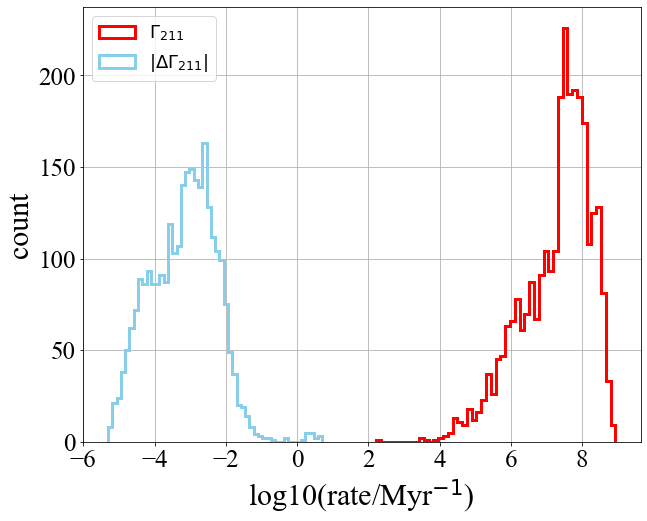

In [17]:
# Filter the 211 participants 

test3=Gamma211List-cuttimed>0
test2=G*Mb * 2e30 * 1.34e-12 *1.78e-36 /(c * hbar )<0.4
test211=test3 * test2 

# Plot the distribution of 211 superradiant rate and the correction of superradiant rate 

testGamma211=test211 * Gamma211List 
testDelta211=test211 * DeltaGamma211List 
plt.figure(figsize=(10,8))
plt.hist(np.log10(testGamma211[testGamma211>0]*Myr),bins=50,lw=3,edgecolor='red',histtype='step')
plt.hist(np.log10(-testDelta211[testDelta211<0]*Myr),bins=50,lw=3,edgecolor='skyblue',histtype='step')
plt.legend(['$\Gamma_{211}$','$|\Delta\Gamma_{211}|$'],fontsize=18)
plt.xlabel('log10(rate/Myr'+'${}^{-1}$'+')',fontproperties=font1)
plt.grid(True)
plt.ylabel('count',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

Also for $\psi_{322}$ mode participants 

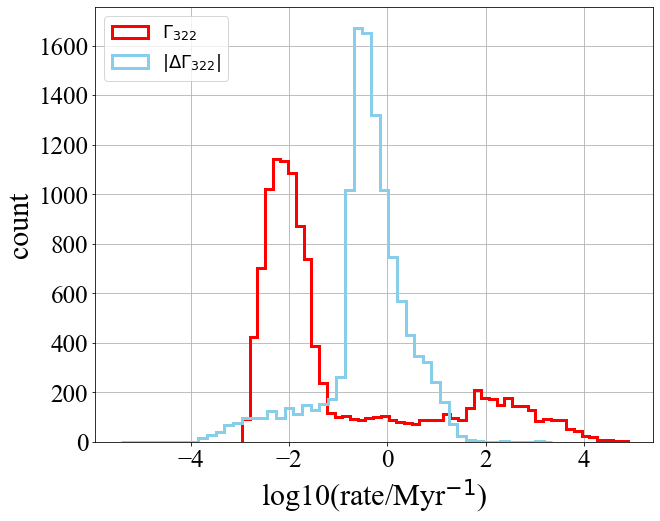

In [18]:
# Filter the 322 data 

test1=Gamma322List-cuttimed>0
test2=G*Mb * 2e30 * 1.34e-12 *1.78e-36 /(c * hbar )<0.4
test=test1 * test2  

# Plot the distribution of 322 superradiant rate and the correction of superradiant rate 
testGamma=test * Gamma322List
testDelta=test * DeltaGamma322List 
plt.figure(figsize=(10,8))
plt.hist(np.log10(testGamma[testGamma>0]*Myr),bins=50,lw=3,edgecolor='red',histtype='step')
plt.hist(np.log10(-testDelta[testDelta<0]*Myr),bins=50,lw=3,edgecolor='skyblue',histtype='step')
plt.legend(['$\Gamma_{322}$','$|\Delta\Gamma_{322}|$'],fontsize=18,loc='upper left')
plt.xlabel('log10(rate/Myr'+'${}^{-1}$'+')',fontproperties=font1)
plt.grid(True)
plt.ylabel('count',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

Similar estimation can be done for PT model  

In [19]:
# Distribution of the spin when we consider PT model with certain parameter choice 

at2=ourspin(period=T,BHmass=Mb,p0=0.8,M0=10,wp=0.5,wm=2)
Daskat2=da.from_array(at2,chunks=1e5)


# Superradiant rate list for 211 and 322 state 

Gamma211ListPT=GAMMA_211(Daskat2,DaskMb,mu = 1.34e-12,verbose=False).compute()
Gamma322ListPT=GAMMA_322(Daskat2,DaskMb,mu = 1.34e-12,verbose=False).compute()


# Change of superradiant rate list for 211 and 322 state 

DeltaGamma211ListPT=DELTA_GAMMA_ACR_211(Daske,DaskMb,Daskq,Dasksemi,Daskat2,mu = 1.34e-12,verbose=False).compute()
DeltaGamma322ListPT=DELTA_GAMMA_ACR_322(Daske,DaskMb,Daskq,Dasksemi,Daskat2,mu = 1.34e-12,verbose=False).compute()

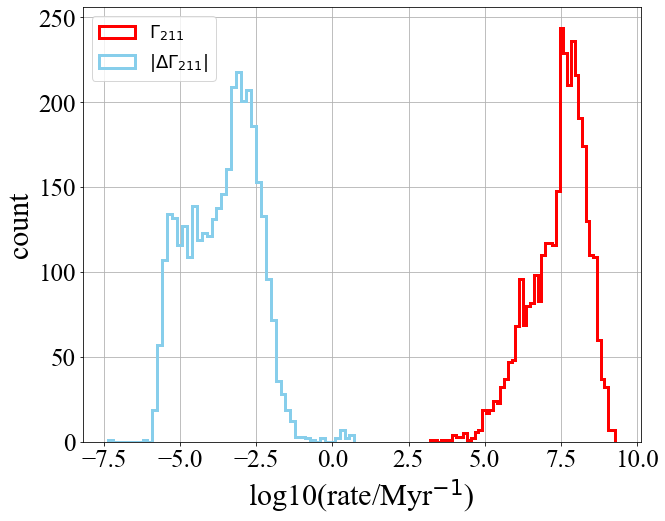

In [20]:
# Filter the 211 data 

test3PT=Gamma211ListPT-cuttimed>0
test2=G*Mb * 2e30 * 1.34e-12 *1.78e-36 /(c * hbar )<0.4
test211PT=test3PT * test2 

# Plot the distribution of 211 superradiant rate and the correction of superradiant rate 

testGamma211PT=test211PT * Gamma211ListPT 
testDelta211PT=test211PT * DeltaGamma211ListPT 

plt.figure(figsize=(10,8))
plt.hist(np.log10(testGamma211PT[testGamma211PT>0]*Myr),bins=50,lw=3,edgecolor='red',histtype='step')
plt.hist(np.log10(-testDelta211PT[testDelta211PT<0]*Myr),bins=50,lw=3,edgecolor='skyblue',histtype='step')
plt.legend(['$\Gamma_{211}$','$|\Delta\Gamma_{211}|$'],fontsize=18)
plt.xlabel('log10(rate/Myr'+'${}^{-1}$'+')',fontproperties=font1)
plt.grid(True)
plt.ylabel('count',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

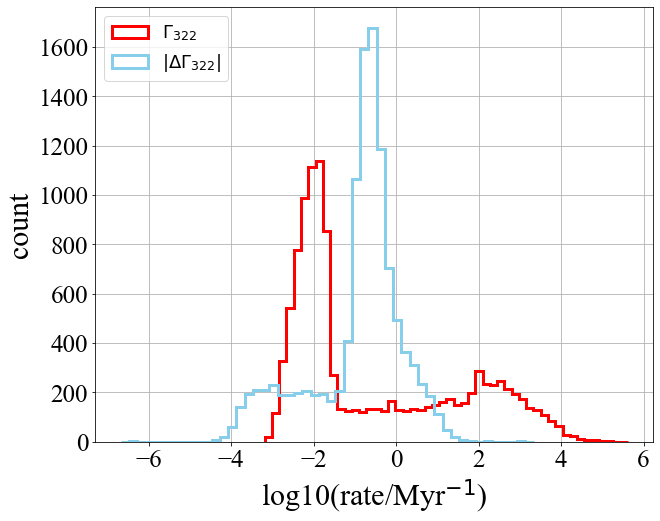

In [21]:
# Filter the 322 data 

test1PT=Gamma322ListPT-cuttimed>0
test2=G*Mb * 2e30 * 1.34e-12 *1.78e-36 /(c * hbar )<0.4
testPT=test1PT * test2 

# Plot the distribution of 322 superradiant rate and the correction of superradiant rate 

testGamma322PT=testPT * Gamma322ListPT 
testDelta322PT=testPT * DeltaGamma322ListPT 

plt.figure(figsize=(10,8))
plt.hist(np.log10(testGamma322PT[testGamma322PT>0]*Myr),bins=50,lw=3,edgecolor='red',histtype='step')
plt.hist(np.log10(-testDelta322PT[testDelta322PT<0]*Myr),bins=50,lw=3,edgecolor='skyblue',histtype='step')
plt.legend(['$\Gamma_{322}$','$|\Delta\Gamma_{322}|$'],fontsize=18,loc='upper left')
plt.xlabel('log10(rate/Myr'+'${}^{-1}$'+')',fontproperties=font1)
plt.grid(True)
plt.ylabel('count',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

# Survival Rate From Superradiance Termination 

In our previous work (Tong et al. 2022), we mentioned that if the binary separation is small enough, the absolute value of correction of superradiant rate can be bigger than the superradiant rate, terminating the superradiant effect. To investigate how this termination effect influence the superradiant BH in reality statistically, we define those with $\Gamma_{nlm}+\Delta\Gamma_{nlm}>0$ as survivors, indicating that they can survive the termination effect and produce an abundantly populated boson cloud.

To characterize the likelihood of a superradiant cloud surviving the termination from a binary companion, we define the survival rate as the ratio of the number of survivors and the number of participants
$$R_{\rm surv}\equiv\frac{N_{\rm surv}}{N_{\rm part}}~,$$
with $R_{\rm surv}\approx 0$ standing for complete cloud termination and $R_{\rm surv}\approx 1$ standing for assured survival.

In [22]:
# Code to calculate survival rate based on the definition above 

def RateOfSurvive_322d(BHspin,BHmass,mumass,Massratio,ecc,semimajor,cut):

    #mumass should be in eV
    
    #superradiance rate bigger than one over the threashold time (Return True or False list)
    sel_cand_1 = GAMMA_322(at=BHspin,Mb=BHmass,mu=mumass,verbose=False)-cut>0
    #alpha<0.4 (Return another True or False list)
    sel_cand_2 = G*BHmass * Msun * mumass *eVtokg /(c * hbar )<0.4
    #Only two condition True together can be True (Return True or False list)
    sel_part_322 = sel_cand_1 * sel_cand_2
    #Delta Gamma<Gamma (Return True or False list)
    sel_surv_322=-DELTA_GAMMA_ACR_322(e=ecc,Mb=BHmass,q=Massratio,a=semimajor,at=BHspin,mu = mumass,verbose=False)/GAMMA_322(at=BHspin,Mb=BHmass,mu=mumass,verbose=False)<1
    
    #Survival for 322 (Need Delta Gamma<Gamma and it should be a participant)
    SurviveOrNot322 = sel_part_322 * sel_surv_322
    
    return da.sum(SurviveOrNot322).compute()/da.sum(sel_part_322).compute()


To reflect the statistical error in a sample of finite dimensionality, we also introduce an uncertainty estimator
$$\sigma (R_{\rm surv})\equiv\frac{1}{\sqrt{N_{\rm part}}}~,$$
which is based on a Poisson distribution.

In [23]:
# Code to calculate error bar based on the definition above 

def ErrorBar_322d(BHspin,BHmass,mumass,Massratio,ecc,semimajor,cut):

    #mumass should be in eV
    sel_cand_1 = GAMMA_322(at=BHspin,Mb=BHmass,mu=mumass,verbose=False)-cut>0 
    sel_cand_2 = G*BHmass * Msun * mumass *eVtokg /(c * hbar )<0.4
    
    sel_part_322 = sel_cand_1 * sel_cand_2
            
    errorbar=1/(np.sqrt(da.sum(sel_part_322).compute()))
    
    return errorbar

It will be useful to estimate how the survival rate $R_{\rm surv}$ change with the boson mass $\mu$. 

In [24]:
# Creating a list of mu, and then calculate the survival rate for each mu 

mulist=1e-13*np.array([1.03**i for i in range(200)])
Daskmulist=da.from_array(mulist,chunks=1e5)

In [25]:
# Survival rate -mu realtion with WR spin model 

# Survival rate list and the errorbar list for each mu 
Ratelistd=[RateOfSurvive_322d(BHspin=Daskat,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist ]
Errord=[ErrorBar_322d(BHspin=Daskat,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist]
error1=np.array(Ratelistd)+(np.array(Errord))
error2=np.array(Ratelistd)-(np.array(Errord))


<Figure size 720x576 with 0 Axes>

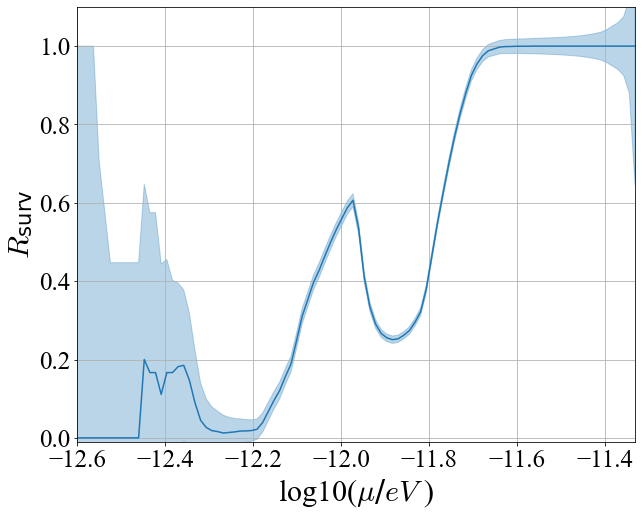

In [26]:
# Plot for the survival rate with the shaded region representing the error bar 

plt.figure(figsize=(10,8))
plt.rcParams['axes.grid'] = True
plt.rcParams['image.cmap'] = 'gray'
plt.figure(figsize=(10,8))
plt.plot(np.log10(mulist),Ratelistd,color='C0')
plt.fill_between( np.log10(mulist),y1=error1, y2=error2, color='C0', alpha=0.3)
plt.ylim((-0.01,1.1))
plt.xlim((-12.6,-11.33))
plt.ylabel('$R_{\mathrm{surv}}$',fontproperties=font1)
plt.xlabel('log10('+'$\mu/eV$'+' )',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()

We can also investigate the behavior of survival rate with our own PT model with different parameter choice. Here we give one example of 

In [27]:
# Survival rate -mu relation with PT spin model 

# Choose the PT spin model with parameters p0=0.8,M0=10,wp=0.5, wm=2
# If you want to plot survival rate with PT model with other parameter choices, directly modify in the "ourspin" code below 
at2=ourspin(period=T,BHmass=Mb,p0=0.8,M0=10,wp=0.5,wm=2)
Daskat2=da.from_array(at2,chunks=1e5)

# Survival rate list and the errorbar list for each mu 
Ratelistd2=[RateOfSurvive_322d(BHspin=Daskat2,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist ]
Errord2=[ErrorBar_322d(BHspin=Daskat2,BHmass=DaskMb,mumass=mui,Massratio=Daskq,ecc=Daske,semimajor=Dasksemi,cut=cuttime) for mui in mulist]

error21=np.array(Ratelistd2)+(np.array(Errord2))
error22=np.array(Ratelistd2)-(np.array(Errord2))


<Figure size 720x576 with 0 Axes>

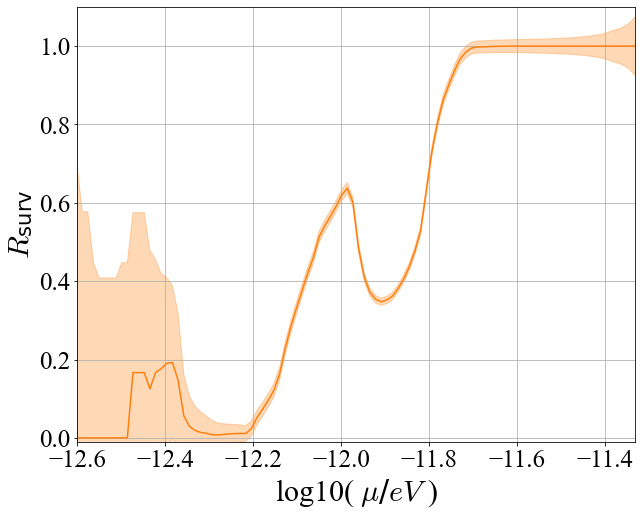

In [28]:
# Plot for the survival rate with the shaded region representing the error bar 

plt.figure(figsize=(10,8))
plt.rcParams['axes.grid'] = True
plt.rcParams['image.cmap'] = 'gray'
plt.figure(figsize=(10,8))
plt.plot(np.log10(mulist),Ratelistd2,color='C1')
plt.fill_between( np.log10(mulist),y1=error21, y2=error22, color='C1', alpha=0.3)
plt.ylim((-0.01,1.1))
plt.xlim((-12.6,-11.33))
plt.ylabel('$R_{\mathrm{surv}}$',fontproperties=font1)
plt.xlabel('log10( '+'$\mu/eV$'+' )',fontproperties=font1)
plt.xticks(fontproperties=font2)
plt.yticks(fontproperties=font2)
plt.show()